In [2]:
!pip install cmake 'gym[atari]==0.22.0' scipy

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 10.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.3 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.22.0-py3-none-any.whl size=708393 sha256=d6829a811711e7f91023bc5545600c609f35fea94f934d60d8ed621ffddc1e37
  Stored in directory: /root/.cache/pip/wheels/c4/15/15/94c62e06887fb88768c5fa41482b80905ea71f3ede81040ffa
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


https://www.gymlibrary.dev/environments/toy_text/taxi/

In [1]:
import time

In [6]:
import gym

env = gym.make("Taxi-v3").env

env.reset() # reset environment to a new, random state

env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
5 * 5 * 5 * 4
# row, col, pick (R,G,B,Y,Car), drop(R,G,B,Y)

The filled square represents the taxi, which is **yellow** without a passenger and **green** with a passenger.

The pipe ("|") represents a wall which the taxi cannot cross.

- **R, G, Y, B** are the possible pickup and destination locations. 
- The **blue** letter represents the current passenger pick-up location, and the **purple** letter is the current destination.

In [7]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [21]:
print(env.step(5)) # 0=Back, 1=Fwd , 2=Right , 3=Left, 4=pickup, 5=dropoff
#observation, reward, done, info
env.render()

(475, 20, True, {'prob': 1.0})
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [22]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [ ]:
# blue - pickup, purple - dropoff
steps = [0,3,3,1,1,4,0,0,2,2,2,2,1,1,5]
states = []

for step in steps:
  resp = env.step(step)
  print(resp)
  states.append(resp)
  env.render()
  time.sleep(1)

In [26]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [27]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [28]:
env.env.s = 328
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## All possible states

In [ ]:
for i in range(50):
  print(i)
  env.env.s = i
  env.render()
  # time.sleep(1)

In [31]:
env.env.s = 328
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## Reward Table

The reward table, also known as the reward function, defines the rewards or penalties associated with each action in each state. It is a fixed table that specifies the immediate reward that the agent receives for taking a particular action in a particular state. The reward table is typically defined by the problem domain, and the Q-learning algorithm uses this table to learn the optimal policy.

In [ ]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

This dictionary has the structure 

```{action: [(probability, nextstate, reward, done)]}.```

In [ ]:
for step in range(6):
  env.env.s = 328
  print(env.step(step))
  env.render()

In [ ]:
for i in range(10):
  print(env.action_space.sample())

4
3
5
4
4
5
2
4
0
3


# Solving the environment without Reinforcement Learning



In [54]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 99
Penalties incurred: 29


In [47]:
len(frames)

568

In [55]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(0.5)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 99
State: 0
Action: 5
Reward: 20


# DP
```
[1,2,3,4,5]
1 = 1
3 = 1+2
6 = 1+2+3
10 = 1+2+3+4
15 = 1+2+3+4+5

1 = 1
3 = 1 + 2
6 = 3 + 3
10 = 6 + 4
15 = 10 + 5

```


## Enter Reinforcement Learning

We are going to use a simple RL algorithm called Q-learning which will give our agent some memory.

## Intro to Q-learning

Essentially, Q-learning lets the agent use the environment's rewards to learn, over time, the best action to take in a given state.


![](https://miro.medium.com/v2/resize:fit:1400/1*EQ-tDj-iMdsHlGKUR81Xgw.png)

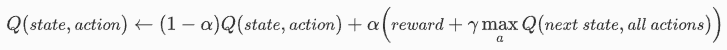

# Implementing Q-learning in python


In [56]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])  

In [57]:
q_table.shape

(500, 6)

In [58]:
q_table

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [62]:
np.argmax([1,2,3])

2

In [59]:
import random
from IPython.display import clear_output

In [63]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1 # learning rate
gamma = 0.6 # discount factor
epsilon = 0.1 # exploit and explore

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 1min 8s, sys: 8.1 s, total: 1min 17s
Wall time: 1min 14s


In [65]:
for i in range(10):
  print(q_table[i])

[0. 0. 0. 0. 0. 0.]
[ -2.41837065  -2.3639511   -2.41837066  -2.36395109  -2.27325184
 -11.3639493 ]
[ -1.870144    -1.45024     -1.87014399  -1.45024007  -0.7504
 -10.45023379]
[ -2.36395101  -2.27325184  -2.36395029  -2.27325181  -2.1220864
 -11.27325008]
[-2.4961915  -2.49656291 -2.4961915  -2.49680945 -9.45879238 -8.48029525]
[0. 0. 0. 0. 0. 0.]
[ -2.4961915   -2.49715321  -2.4961915   -2.49689163 -10.46663985
  -9.50877724]
[-2.48236806 -2.48455841 -2.48236806 -2.484406   -8.47407677 -9.66789661]
[-2.27325184 -2.32928432 -2.34522429 -2.34113999 -8.69224525 -9.39155281]
[ -2.47061344  -2.47818772  -2.47855343  -2.47607242  -9.68543571
 -10.17891183]


In [66]:
q_table[328]

array([ -2.40800594,  -2.27325184,  -2.3922264 ,  -2.35603561,
       -10.60994385, -10.80888382])

# Evaluating the agent


In [ ]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.14
Average penalties per episode: 0.0


## Realtime testing

In [67]:
env.env.s = 328
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [77]:
env.reset()
env.s = 328  # set environment to illustration's state
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [78]:

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 18
Penalties incurred: 0


In [79]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

https://developer.nvidia.com/blog/deep-learning-nutshell-reinforcement-learning/

https://medium.com/@MoneyAndData/ai-anyone-can-understand-part-1-reinforcement-learning-6c3b3d623a2d

https://arshren.medium.com/deep-q-learning-a-deep-reinforcement-learning-algorithm-f1366cf1b53d

https://www.coursera.org/specializations/reinforcement-learning